In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [32]:
df = pd.read_csv("problem1.csv")
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [34]:
# Summary statistics
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


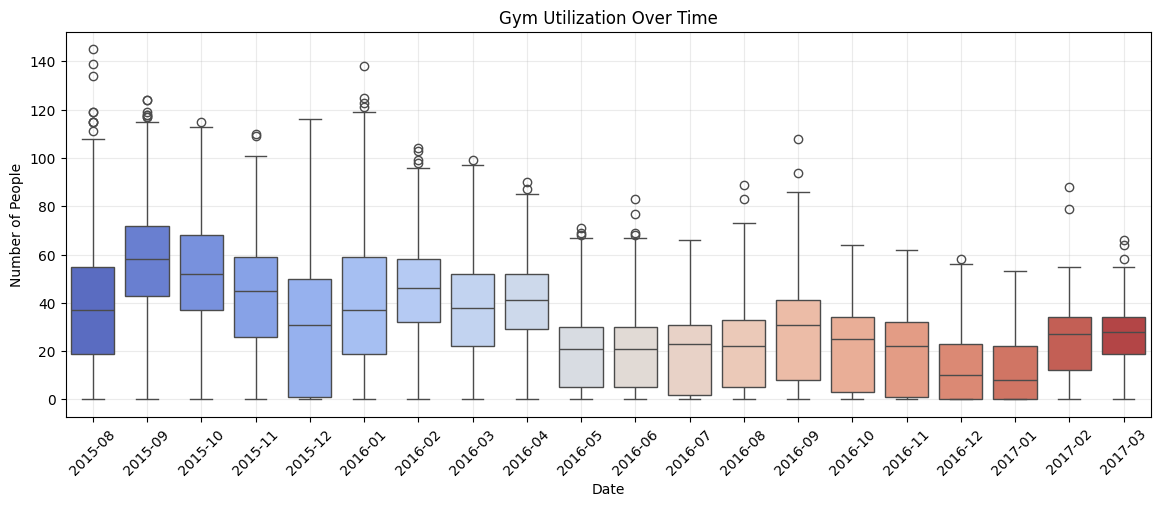

In [57]:
# To observe trends and patterns in gym utilization over time, identifying peaks and troughs.
plt.figure(figsize=(14, 5))
dft = df.copy()
dft['date']= pd.to_datetime(dft['date'], utc=True)
dft['year_month'] = dft['date'].dt.to_period('M').astype(str)
# Group by 'year_month' and calculate the mean of 'number_people'
# average_people = dft.groupby('year_month')['number_people'].mean().reset_index()

# Plotting the results
sns.boxplot(data=dft, x='year_month', y='number_people', palette="coolwarm")
plt.title('Gym Utilization Over Time')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(alpha=0.25)
plt.show()

### Findings
- **Overall Decline:** There is a noticeable decrease in gym utilization from 2015 to 2017.
- **Seasonal Patterns:** Seasonal fluctuations are present, with diminishing peaks over time.
- **Variation:** The range of utilization remains consistent, indicating periods of high usage still exist.

### Actionable Insights
- **Identify Causes:** Investigate the reasons for the decline to develop targeted solutions.
- **Optimize Marketing:** Focus marketing efforts on seasonal peaks to maintain or boost utilization.

### Possible Reasons for Decline
1. **Competition:** New gyms or fitness centers may offer better facilities or pricing.
2. **Demographic Changes:** Shifts in the local population or interests could impact gym visits.
3. **Economic Factors:** Financial constraints may lead to reduced memberships.
4. **Seasonal Effects:** Certain times of the year may be less favorable for gym visits.
5. **Customer Satisfaction:** Issues with facilities or services could affect retention.

### Strategies to Optimize Utilization and Maximize Satisfaction and Profits

### 1. Enhance Member Experience
- **Improve Facilities:** Upgrade equipment and amenities.
- **Customer Service:** Train staff to provide excellent service and address concerns.

### 2. Targeted Marketing and Promotions
- **Seasonal Campaigns:** Run targeted campaigns during high-traffic periods.
- **Special Offers:** Provide promotions during low-traffic times.

### 3. Analyze and Adapt
- **Membership Data:** Regularly analyze data to identify trends.
- **Feedback Mechanism:** Implement systems to gather and act on member feedback.

### 4. Increase Community Engagement
- **Events and Classes:** Organize activities to engage members and attract new ones.
- **Partnerships:** Collaborate with local businesses for exclusive member benefits.

### 5. Optimize Scheduling and Staffing
- **Peak Hours:** Adjust staffing and hours based on peak times.
- **Flexible Membership Plans:** Offer options to accommodate different needs.

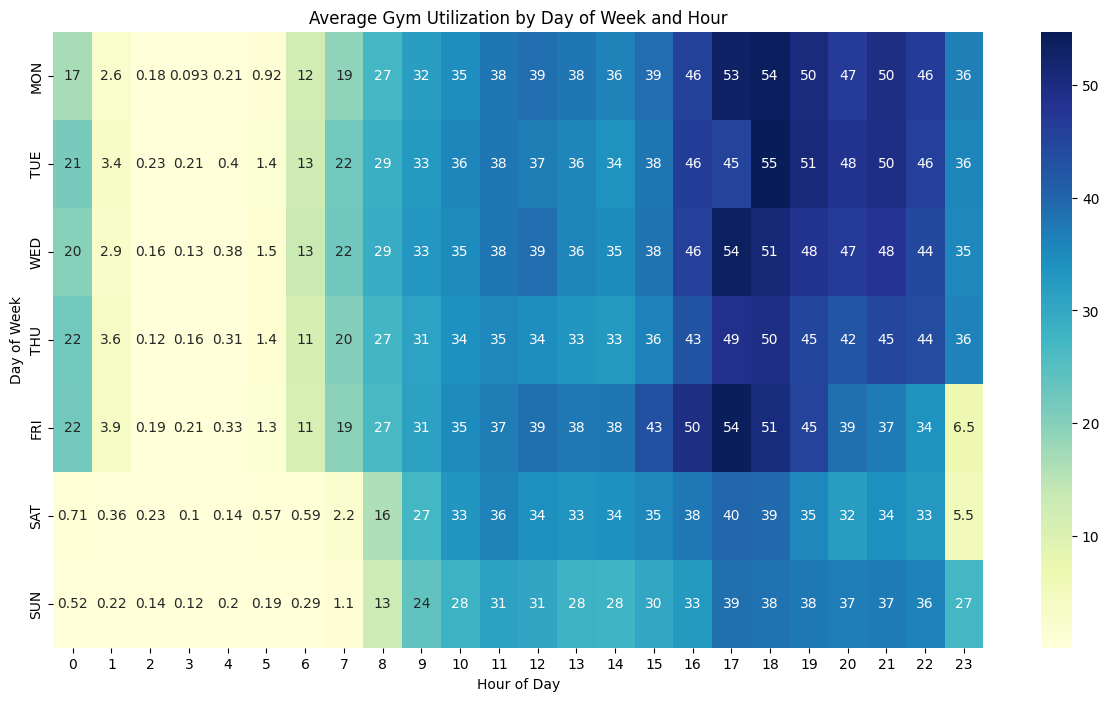

In [35]:
pivot_table = df.pivot_table(index='day_of_week', columns='hour', values='number_people', aggfunc='mean')
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True)
plt.title('Average Gym Utilization by Day of Week and Hour')
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], labels=["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"])
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

### Findings:

The heatmap visualizing gym utilization by day of the week and hour of the day reveals the following key patterns:

- **Peak Utilization**: The gym experiences the highest utilization during the evening hours, specifically between 4 PM and 8 PM, indicating that this is the most popular time for gym-goers.
- **Low Utilization Early Morning**: Gym activity is minimal from 2 AM to 6 AM across all days of the week, reflecting low demand during these hours.
- **Weekend Trends**: Utilization is generally lower on weekends compared to weekdays. However, the peak hours on weekends shift to 8 AM to 12 PM, suggesting that members may prefer exercising in the morning on weekends.
- **Friday and Saturday Nights**: There is a noticeable dip in gym usage from 10 PM to 12 AM on Friday and Saturday nights, which may indicate a preference for social or leisure activities during these times.

**Actionable Insights**:
- **Adjust Staffing and Operations**: Ensure adequate staffing during peak hours (4 PM to 8 PM) and consider reducing staffing or operational hours during low-utilization periods (2 AM to 6 AM).
- **Targeted Marketing**: Develop promotional campaigns or special classes during peak hours to attract more members and increase engagement.
- **Weekend Programs**: Implement special weekend programs or events in the morning to boost weekend utilization and cater to morning exercisers.

### 2. Possible Reasons for Observed Trends

1. **Work Schedules**: Many people prefer to work out in the evening after work hours, contributing to high utilization from 4 PM to 8 PM.
2. **Early Morning Preferences**: Low utilization early in the morning could be due to members preferring to exercise later in the day or having early morning commitments.
3. **Weekend Behavior**: Lower gym utilization on weekends might be influenced by outdoor activities, family commitments, or social events that take precedence.
4. **Social Activities**: Reduced utilization late at night on Friday and Saturday might be attributed to social or leisure activities that are more appealing than a late gym visit.

### 3. Strategies to Optimize Gym Utilization and Maximize Client Satisfaction and Profits

**1. Enhance Evening Experience**:
   - **Peak Time Promotions**: Offer special classes, discounts, or promotions during peak hours (4 PM to 8 PM) to attract more members.
   - **Enhanced Services**: Provide additional amenities or services during busy hours to improve member experience and manage high traffic effectively.

**2. Address Low Utilization Hours**:
   - **Special Programs**: Introduce early morning or late-night fitness programs to cater to different member preferences and potentially increase utilization during these times.
   - **Flexible Hours**: Consider adjusting gym hours based on member feedback to better align with their schedules and preferences.

**3. Boost Weekend Engagement**:
   - **Weekend Events**: Organize engaging weekend events, workshops, or challenges to encourage more gym visits during weekends.
   - **Morning Incentives**: Provide incentives or special offers for morning workouts on weekends to attract early risers.

**4. Analyze and Adapt**:
   - **Feedback Collection**: Regularly collect member feedback to understand their preferences and adjust gym operations and offerings accordingly.
   - **Utilization Patterns**: Continuously monitor utilization patterns to make data-driven decisions on staffing, scheduling, and promotional strategies.

By addressing these trends and implementing targeted strategies, you can enhance gym utilization, improve member satisfaction, and ultimately increase profitability.

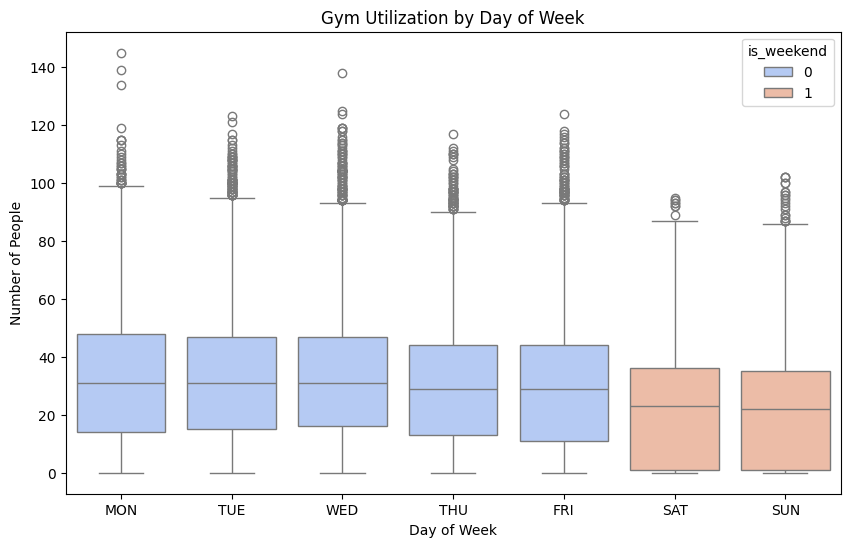

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='day_of_week', y='number_people', hue="is_weekend", palette="coolwarm")
plt.title('Gym Utilization by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of People')
plt.xticks(ticks=range(0,7),labels=["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"])
plt.show()


### Findings

The boxplot of gym utilization by day of the week provides the following insights:

- **Consistency During Weekdays**: The median gym utilization from Monday to Friday is relatively consistent, with similar levels of activity across these days. The interquartile ranges (25th to 75th percentiles) also show that the variability in utilization is similar throughout the week.
- **Weekend Utilization**: Gym usage on weekends (Saturday and Sunday) tends to be slightly lower compared to weekdays. The median values for weekends are lower, and the variability in utilization is less pronounced.
- **Peak Utilization on Monday**: Notably, there is a peak in gym utilization on Mondays, which is higher than other weekdays. This peak is marked as an outlier, indicating a higher-than-usual number of people using the gym on this day.

**Actionable Insights**:
- **Adjust for Weekdays**: Maintain consistent services and staffing levels throughout the weekdays, as utilization patterns do not vary significantly.
- **Improve Weekend Experience**: Develop strategies to increase weekend gym visits, such as special weekend classes or promotions.
- **Address Monday Peak**: Given the higher utilization on Mondays, ensure adequate staffing and resources to handle the increased demand and consider introducing special Monday promotions or programs to capitalize on this trend.

### 2. Possible Reasons for Observed Trends

1. **Weekday Consistency**: The consistent utilization during weekdays may reflect regular workout routines of members who follow a standard schedule, making it less sensitive to day-specific variations.
2. **Weekend Activities**: Lower utilization on weekends could be due to alternative activities or leisure time, which may reduce members' motivation to visit the gym.
3. **Monday Motivation**: The higher utilization on Mondays could be driven by members starting the week with new goals or resolutions. This is a common trend where individuals use Monday as a motivational starting point for their weekly fitness routines.

### 3. Strategies to Optimize Gym Utilization and Maximize Client Satisfaction and Profits

**1. Enhance Weekday Experience**:
   - **Consistent Service Levels**: Ensure that staffing and amenities are maintained at a high standard throughout the weekdays to support consistent utilization.
   - **Regular Engagement**: Keep members engaged with regular programs and incentives that encourage consistent visits.

**2. Boost Weekend Utilization**:
   - **Special Weekend Offers**: Introduce weekend-specific promotions or classes to attract more members during these days.
   - **Weekend Challenges**: Organize fitness challenges or events on weekends to make gym visits more appealing.

**3. Capitalize on Monday Peak**:
   - **Monday Promotions**: Offer special discounts or new class launches on Mondays to leverage the increased motivation and drive higher engagement.
   - **Optimize Resources**: Prepare for higher demand on Mondays by ensuring adequate staffing, equipment availability, and services to handle the peak utilization effectively.

**4. Continuous Monitoring**:
   - **Feedback Collection**: Gather member feedback regularly to understand their preferences and adjust strategies accordingly.
   - **Utilization Analysis**: Continuously analyze utilization patterns to adapt offerings and operational strategies to meet changing member needs and preferences.

By addressing these trends and implementing targeted strategies, you can enhance gym utilization, improve member satisfaction, and increase overall profitability.

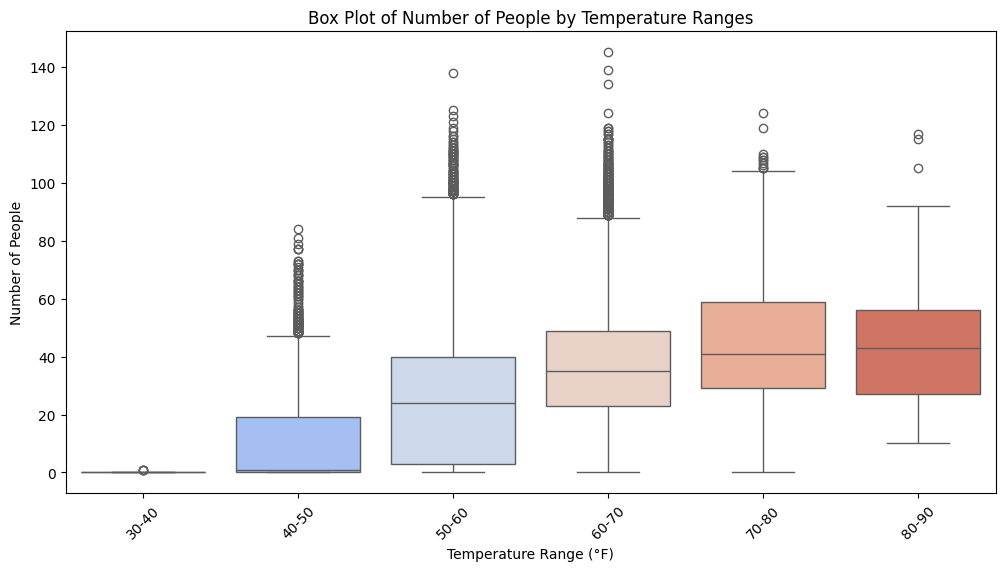

In [14]:
# Define temperature bins and labels
bins = [30, 40, 50, 60, 70, 80, 90]
labels = ['30-40', '40-50', '50-60', '60-70', '70-80', '80-90']

dft = df.copy()
# Assign temperature ranges to a new column
dft['temp_range'] = pd.cut(dft['temperature'], bins=bins, labels=labels, right=False)

# Plotting the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=dft, x='temp_range', y='number_people', palette='coolwarm')
plt.title('Box Plot of Number of People by Temperature Ranges')
plt.xlabel('Temperature Range (°F)')
plt.ylabel('Number of People')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()



### 1. Findings

The boxplot of gym utilization by temperature range reveals the following insights:

- **Utilization Across Temperature Ranges**: Gym utilization spans temperatures between 40°F and 90°F. Utilization shows a general trend of increasing with rising temperatures, peaking within the 60-70°F range.
- **Optimal Temperature Range**: The highest average utilization is observed within the 60-70°F temperature range. This suggests that moderate temperatures may be most comfortable and conducive to gym attendance.
- **Decline at Higher Temperatures**: Utilization slightly decreases when temperatures rise beyond 80°F. This could indicate discomfort or reduced motivation to visit the gym in hotter weather conditions.

**Actionable Insights**:
- **Comfortable Temperature Range**: Recognize that moderate temperatures (60-70°F) are ideal for higher gym utilization. Consider maintaining a comfortable indoor temperature within this range to encourage more visits.
- **Address Hot Weather Decline**: Develop strategies to mitigate the impact of high temperatures on gym attendance. For example, provide cooling options or incentives for members to visit during hotter periods.

### 2. Possible Reasons for Observed Trends

1. **Comfort Levels**: Members may find moderate temperatures (60-70°F) more comfortable for exercising, leading to higher utilization. Extreme temperatures (both cold and hot) might affect comfort levels and reduce gym visits.
2. **Heat Sensitivity**: Higher temperatures (80-90°F) can lead to discomfort or dehydration, making the gym environment less appealing. Members might avoid the gym during very hot weather.
3. **Seasonal Factors**: The variation in gym utilization with temperature could also reflect seasonal behavior patterns. Members might be more inclined to work out in cooler months and less motivated during peak summer heat.

### 3. Strategies to Optimize Gym Utilization and Maximize Client Satisfaction and Profits

**1. Maintain Optimal Indoor Climate**:
   - **Temperature Control**: Ensure that the gym environment remains within the comfortable temperature range of 60-70°F to encourage regular attendance.
   - **Climate Management**: Invest in efficient heating and cooling systems to maintain a pleasant indoor temperature year-round.

**2. Address High Temperature Challenges**:
   - **Cooling Solutions**: Implement additional cooling measures such as fans or air conditioning to counteract high temperatures and make the gym more comfortable during hot weather.
   - **Heat-Friendly Programs**: Offer special programs or discounts during hot periods to maintain engagement and attract members despite the heat.

**3. Enhance Member Experience**:
   - **Comfort Amenities**: Provide amenities such as water stations, cooling towels, and comfortable workout areas to improve the overall experience, especially during extreme temperatures.
   - **Seasonal Promotions**: Tailor promotions and incentives to align with seasonal temperature trends, encouraging consistent gym visits throughout the year.

**4. Monitor and Adapt**:
   - **Feedback Collection**: Regularly gather member feedback on comfort and temperature preferences to adjust strategies as needed.
   - **Utilization Analysis**: Continuously analyze utilization patterns in relation to temperature to adapt operational strategies and optimize member satisfaction.

By addressing temperature-related trends and implementing strategies to improve comfort and engagement, you can enhance gym utilization, improve member satisfaction, and increase overall profitability.

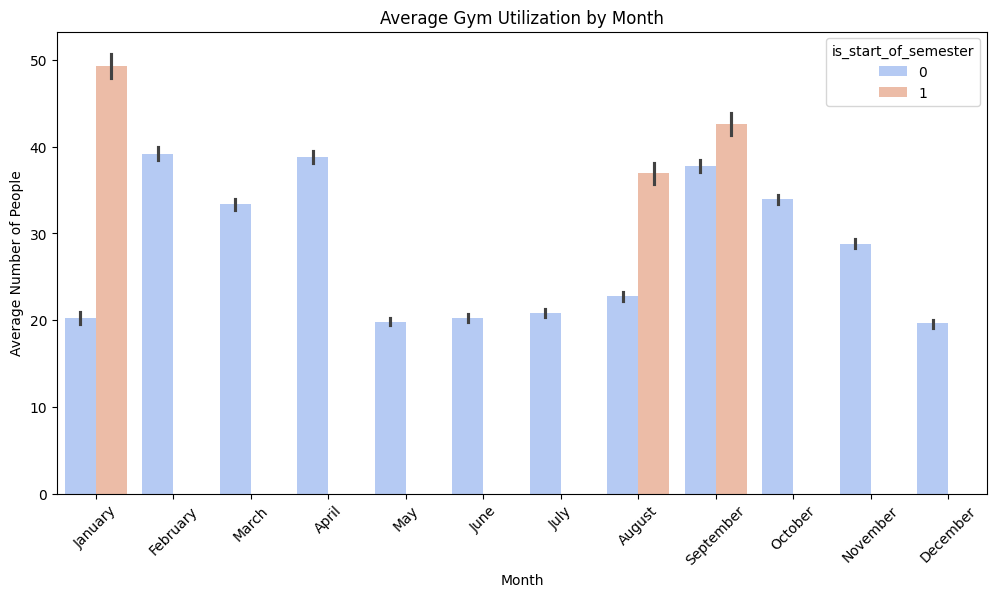

In [60]:
# plt.figure(figsize=(10, 6))
# sns.barplot(data=df, x='month', y='number_people', estimator=np.mean)
# plt.title('Average Gym Utilization by Month')
# plt.xlabel('Month')
# plt.ylabel('Average Number of People')
# plt.show()

dft = df.copy()
# Convert 'date' column to datetime if not already
dft['date'] = pd.to_datetime(dft['date'], utc=True)
# Extract month from date and create a new column
dft['month'] = dft['date'].dt.month_name()

# Define the order of months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

dft['month'] = pd.Categorical(dft['month'], categories=month_order, ordered=True)


# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=dft, x='month', y='number_people', hue="is_start_of_semester",estimator=np.mean, palette='coolwarm')
plt.title('Average Gym Utilization by Month')
plt.xlabel('Month')
plt.ylabel('Average Number of People')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Revised Findings

- **Seasonal Utilization Patterns**: Gym utilization exhibits notable seasonal trends throughout the year:
  - **Peak Utilization in January**: January shows the highest average utilization, coinciding with the start of the school semester and likely reflecting New Year resolutions and increased motivation to engage in fitness activities.
  - **Lower Utilization from May to July**: Utilization drops significantly from May through July. This period may align with summer vacations, reduced schedules, or outdoor activities taking precedence over indoor gym workouts.
  - **Increased Utilization from August to September**: Utilization rises again in August and September, coinciding with the start of a new school semester and possibly reflecting a return to routine and renewed focus on fitness.
  - **Decline in December**: Utilization dips in December, potentially due to holiday distractions, travel, and a general end-of-year slowdown.

**Actionable Insights**:
- **Plan for Peaks and Lows**: Adjust gym resources and staffing levels based on these seasonal trends to maximize service efficiency and member engagement throughout the year.

### 2. Possible Reasons for Observed Trends

1. **New Year Motivation**: Increased motivation for fitness at the start of the year, driven by New Year's resolutions and the academic semester beginning, leads to higher gym utilization in January.
2. **Summer Vacation and Activities**: Lower gym attendance during summer months (May to July) may be due to vacations, outdoor activities, and changes in daily routines, reducing the priority for gym visits.
3. **Back-to-School Effect**: Utilization rises as routines return to normal with the start of the school semester in August and September. This period often sees renewed focus on personal health and fitness.
4. **Holiday Distractions**: The holiday season in December brings travel, festivities, and a general decrease in regular schedules, leading to reduced gym attendance.

### 3. Strategies to Optimize Gym Utilization and Maximize Client Satisfaction and Profits

**1. Capitalize on Peak Periods**:
   - **Promotions and Membership Drives**: Launch special promotions, discounts, and membership drives in January and August to capitalize on increased motivation and the return to routine.
   - **Engaging Programs**: Introduce engaging fitness programs and challenges to attract and retain members during peak periods.

**2. Address Low Utilization Periods**:
   - **Seasonal Promotions**: Offer targeted promotions or special programs during low-utilization months (May-July and December) to encourage continued engagement.
   - **Outdoor Activities**: Consider organizing outdoor or seasonal fitness events to maintain member interest and attendance during warmer months.

**3. Adjust Resources Based on Trends**:
   - **Staffing and Resources**: Align staffing levels and gym resources with expected utilization trends to ensure optimal service and member satisfaction throughout the year.
   - **Facility Maintenance**: Schedule facility maintenance and upgrades during lower utilization periods to minimize disruption during peak times.

**4. Engage Members Year-Round**:
   - **Flexible Membership Options**: Provide flexible membership options or class packages that cater to varying seasonal patterns and member needs.
   - **Feedback and Adaptation**: Continuously gather member feedback to understand their preferences and adapt strategies to improve satisfaction and retention throughout the year.

By understanding and responding to these seasonal utilization patterns, you can better align gym offerings, promotions, and resources to enhance client satisfaction and optimize gym utilization year-round.

01:27:28 - cmdstanpy - INFO - Chain [1] start processing
01:28:02 - cmdstanpy - INFO - Chain [1] done processing


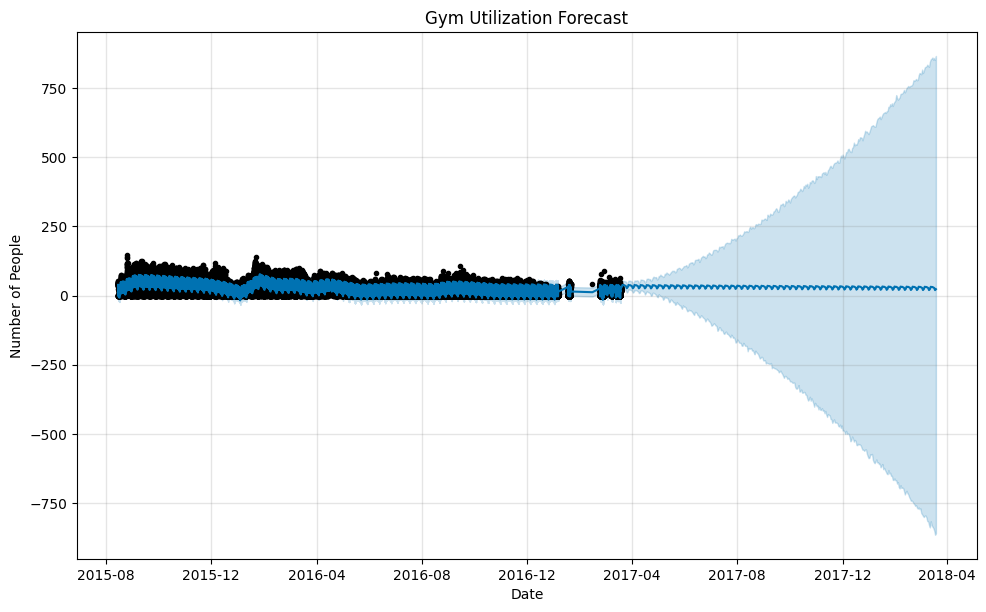

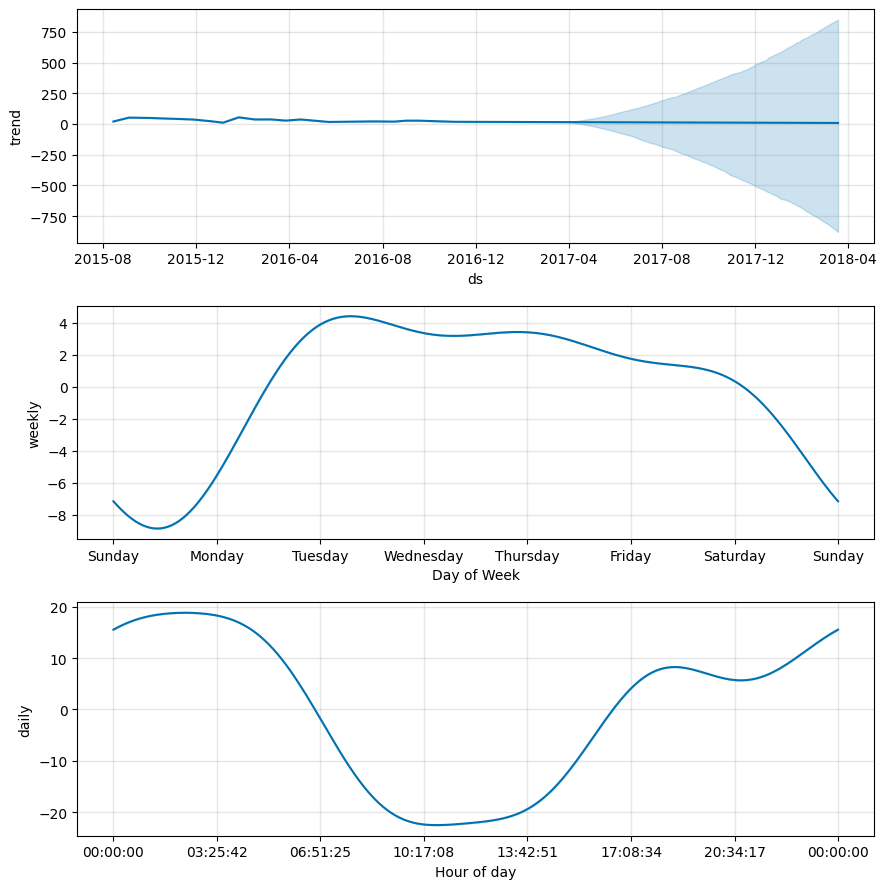

In [27]:
from prophet import Prophet

# Example data (replace this with your actual DataFrame)
dft = df[['date', 'number_people']].rename(columns={'date': 'ds', 'number_people': 'y'})

# Convert 'date' column to datetime
dft['ds'] = pd.to_datetime(dft['ds'], errors='coerce', utc=True)

# Remove timezone information if present
dft['ds'] = dft['ds'].dt.tz_localize(None)

# Drop rows where 'ds' could not be converted
dft = dft.dropna(subset=['ds'])

# Rename columns if not already done
dft = dft.rename(columns={'date': 'ds', 'number_people': 'y'})

# Initialize and fit the Prophet model
model = Prophet()
model.fit(dft)

# Create a dataframe with future dates to forecast
future = model.make_future_dataframe(periods=365)  # Adjust periods as needed
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Gym Utilization Forecast')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.show()

# Plot forecast components (trends, seasonality, etc.)
fig2 = model.plot_components(forecast)
plt.show()


## Model Description

The Prophet model was used to forecast future gym utilization trends based on historical data. The forecast includes trend and seasonality components.

## Findings

### Trend Plot

- Helps identify long-term changes in gym utilization.
- An upward trend indicates increasing popularity, while a downward trend might suggest a decline.

### Seasonality Plot

- Reveals weekly patterns, showing which days have higher or lower utilization.

## How It Helps GoodLife

### Demand Planning

- By forecasting future utilization, GoodLife can better manage staffing levels, optimize equipment availability, and plan maintenance during low-utilization periods.

### Marketing Strategies

- Understanding seasonal and weekly trends allows for targeted promotions. For example, if utilization drops in certain months, special offers or events can be planned to attract members.

### Facility Management

- Anticipating busy periods helps in planning for crowd management, enhancing member experience during peak times.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.preprocessing import StandardScaler

# Feature selection
features = ['day_of_week', 'hour', 'temperature', 'month', 'is_weekend', 'is_holiday', 'is_start_of_semester']
X = df[features]
y = df['number_people']

# Convert categorical features to numerical values if not already done
X['month'] = X['month'].astype('category').cat.codes

# Initialize StandardScaler
scaler = StandardScaler()

# Scale features
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)
explained_var = explained_variance_score(y_test, y_test_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")
print(f"Explained Variance Score: {explained_var}")

Mean Squared Error (MSE): 39.15823375509586
Mean Absolute Error (MAE): 4.257478618045849
Root Mean Squared Error (RMSE): 6.257654013693619
R^2 Score: 0.9242364166556786
Explained Variance Score: 0.9242452496097389


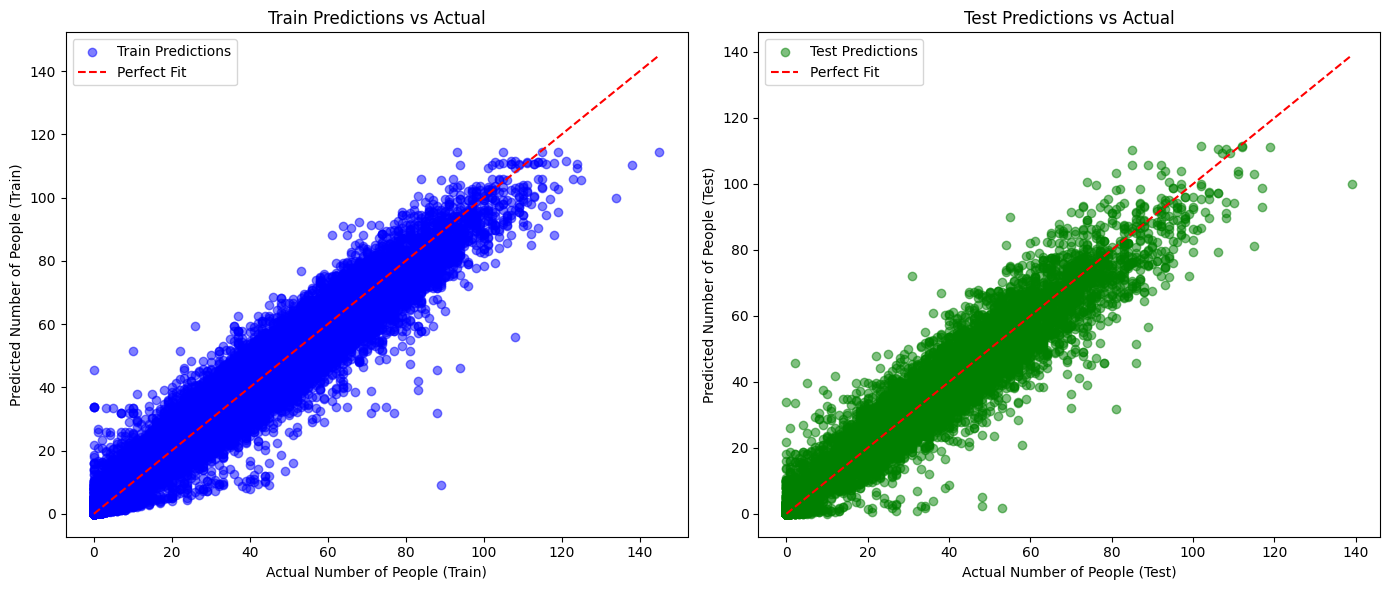

In [21]:
plt.figure(figsize=(14, 6))

# Train Predictions
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5, color='blue', label='Train Predictions')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Perfect Fit')
plt.xlabel('Actual Number of People (Train)')
plt.ylabel('Predicted Number of People (Train)')
plt.title('Train Predictions vs Actual')
plt.legend()

# Test Predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5, color='green', label='Test Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
plt.xlabel('Actual Number of People (Test)')
plt.ylabel('Predicted Number of People (Test)')
plt.title('Test Predictions vs Actual')
plt.legend()

plt.tight_layout()
plt.show()


### Model Description

A Random Forest Regressor was used to predict the number of people in the gym based on various features such as day of the week, temperature, and holiday status.

### Findings

#### Performance Metrics
- **Mean Squared Error (MSE):** 39.16
- **Mean Absolute Error (MAE):** 4.26
- **Root Mean Squared Error (RMSE):** 6.26
- **R² Score:** 0.92
- **Explained Variance Score:** 0.92

### How It Helps GoodLife

#### Predictive Insights
The model provides accurate predictions of gym utilization based on various features, allowing for proactive management of resources and adjustments to gym operations.

#### Personalized Offers
By understanding how different factors affect utilization, GoodLife can create personalized promotions or memberships based on weather conditions, day of the week, and other features.

#### Resource Allocation
Accurate predictions help in better allocation of resources, such as scheduling additional staff or adjusting facility hours.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Create binary target variable for high/low utilization
df['high_utilization'] = df['number_people'] > df['number_people'].median()
y = df['high_utilization']

# Feature selection
X = df[features]

# Convert categorical features to numerical values if not already done
X['month'] = X['month'].astype('category').cat.codes

# Initialize StandardScaler
scaler = StandardScaler()

# Scale features
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.77      0.74      0.76      6371
        True       0.74      0.77      0.76      6066

    accuracy                           0.76     12437
   macro avg       0.76      0.76      0.76     12437
weighted avg       0.76      0.76      0.76     12437



### Model Description

A Logistic Regression model was used to classify gym usage into high or low utilization based on features.

### Findings

#### Performance Metrics
- **Accuracy:** 76%
- **Precision, Recall, F1-Score:** Balanced for high and low utilization categories.

### How It Helps GoodLife

#### Targeted Interventions
The classification model helps identify periods of high and low utilization, allowing GoodLife to implement targeted strategies to address low-usage times, such as special classes or promotions.

#### Member Engagement
Understanding when utilization is low can help in creating engaging programs or incentives to boost attendance.

#### Operational Efficiency
By predicting high utilization periods, GoodLife can ensure adequate staffing and resources to handle peak times, improving overall member satisfaction.

### Collective Optimization Strategies

#### Integrated Forecasting and Prediction
Combining the insights from the Prophet forecast with Random Forest predictions enables a comprehensive approach to understanding both long-term trends and immediate changes in gym utilization.

#### Dynamic Resource Management
Use the forecasts and predictions to dynamically adjust staffing, equipment availability, and facility maintenance schedules, ensuring a seamless experience for members.

#### Enhanced Marketing and Promotions
Leverage the understanding of seasonal and weekly patterns to design targeted marketing campaigns and promotional offers, improving engagement and driving higher utilization during off-peak times.

#### Customized Member Experiences
Implement personalized offers and incentives based on predicted utilization and member behavior patterns, enhancing satisfaction and loyalty.

#### Data-Driven Decision Making
Use the insights from both regression and classification models to make informed decisions about operational changes, facility upgrades, and member engagement strategies.